In [1]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a=ldata("yeast_AP-MS.txt")
b=ldata("yeast_LIT.txt")
d=ldata("yeast_Y2H.txt")

# print("(a) Red Yeast Y2H")
# G = nx.Graph()
# G.add_edges_from(a)
# nx.draw(G, node_size=5)
# plt.show()

G = nx.Graph()
G.add_edges_from(a)

H = nx.Graph()
H.add_edges_from(b)

J = nx.Graph()
J.add_edges_from(d)

an=G.number_of_nodes()
bn=H.number_of_nodes()
dn=J.number_of_nodes()

print("numero de nodos de la red AP-MS    = "+str(an))
print("numero de nodos de la red Liter  = "+str(bn))
print("numero de nodos de la red Y2H    = "+str(an))

print("numero de enlaces de la red AP-MS    = "+str(G.number_of_edges()))
print("numero de enlaces de la red Liter  = "+str(H.number_of_edges()))
print("numero de enlaces de la red Y2H. = "+str(J.number_of_edges()))

grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_g=np.mean(np.asarray(grados))
print(' <k>AP-MS  = '+str(grados_media_g))

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_h=np.mean(np.asarray(grados))
print(' <k>Liter = '+str(grados_media_h))

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_j=np.mean(np.asarray(grados))
print(' <k>Y2H  = '+str(grados_media_j))

av=nx.average_clustering(G)
tr=nx.transitivity(G)
print('<C_av_local>AP-MS  = '+str(av))
print('<C_global>AP-MS = '+str(tr))

av=nx.average_clustering(H)
tr=nx.transitivity(H)
print('<C_av_local>Liter  = '+str(av))
print('<C_global>Liter = '+str(tr))

av=nx.average_clustering(J)
tr=nx.transitivity(J)
print('<C_av_local>Y2H = '+str(av))
print('<C_global>Y2H = '+str(tr))

numero de nodos de la red AP-MS    = 1622
numero de nodos de la red Liter  = 1536
numero de nodos de la red Y2H    = 1622
numero de enlaces de la red AP-MS    = 9070
numero de enlaces de la red Liter  = 2925
numero de enlaces de la red Y2H. = 2930


ValueError: too many values to unpack (expected 2)

In [ ]:

cont = 0
for i in G.edges:
    if i in H.edges:
        cont=cont+1
print(cont/G.number_of_edges())  

cont = 0
for i in H.edges:
    if i in G.edges:
        cont=cont+1
print(cont/H.number_of_edges()) 

cont = 0
for i in G.edges:
    if i in J.edges:
        cont=cont+1
print(cont/G.number_of_edges()) 

cont = 0
for i in J.edges:
    if i in G.edges:
        cont=cont+1
print(cont/J.number_of_edges()) 

cont = 0
for i in J.edges:
    if i in H.edges:
        cont=cont+1
print(cont/J.number_of_edges()) 

cont = 0
for i in H.edges:
    if i in J.edges:
        cont=cont+1  
print(cont/H.number_of_edges()) 


In [ ]:
es=ldata("esenciales.txt")

for i in G.nodes:
    G.nodes[i]["es"] = 0

for n in es:
    if n[0] in G.nodes:
        G.nodes[n[0]]["es"] = 1

for i in J.nodes:
    J.nodes[i]["es"] = 0

for n in es:
    if n[0] in J.nodes:
        J.nodes[n[0]]["es"] = 1
        
for i in H.nodes:
    H.nodes[i]["es"] = 0

for n in es:
    if n[0] in H.nodes:
        H.nodes[n[0]]["es"] = 1

In [ ]:
grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if G.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Gx=x.copy()

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if H.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Hx=x.copy()

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if J.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Jx=x.copy()

plt.plot(Gx,frac)
plt.plot(Hx,frac)
plt.plot(Jx,frac)
plt.show()


In [2]:
GG=G.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1
    grados_GG = [gra for (nom,gra) in GG.degree()]
    Grados = np.asarray(grados_GG)
    I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if GG.degree[i]==np.max(Grados):
            GG.remove_node(i)
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))


plt.plot(pasos,dg)
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

ValueError: too many values to unpack (expected 2)

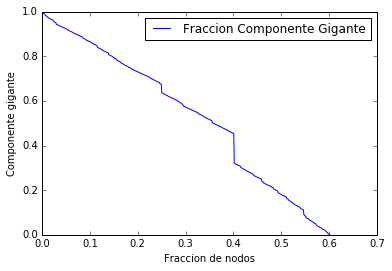

In [139]:
import random

GG=G.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1

    listanodos = [nom for (nom,gra) in GG.degree()]
    GG.remove_node(random.choice(listanodos))
    
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()


plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

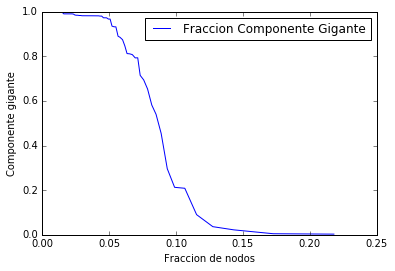

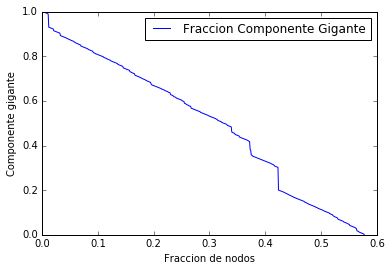

In [140]:
GG=H.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1
    grados_GG = [gra for (nom,gra) in GG.degree()]
    Grados = np.asarray(grados_GG)
    I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if GG.degree[i]==np.max(Grados):
            GG.remove_node(i)
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

GG=H.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1

    listanodos = [nom for (nom,gra) in GG.degree()]
    GG.remove_node(random.choice(listanodos))
    
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

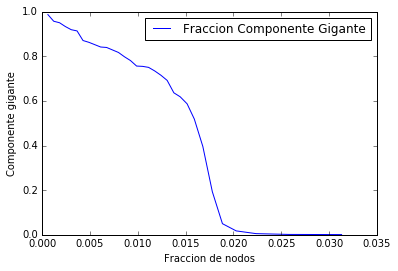

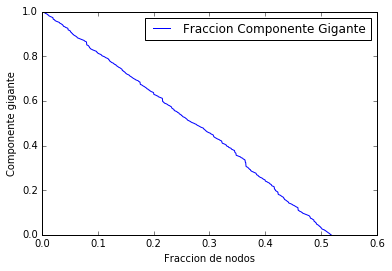

In [141]:
GG=J.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1
    grados_GG = [gra for (nom,gra) in GG.degree()]
    Grados = np.asarray(grados_GG)
    I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if GG.degree[i]==np.max(Grados):
            GG.remove_node(i)
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


GG=J.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1

    listanodos = [nom for (nom,gra) in GG.degree()]
    GG.remove_node(random.choice(listanodos))
    
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()